In [ ]:
from IPython.display import HTML; HTML(f"""<style>{open("./styles/styles.css").read()}</style>""")

<center>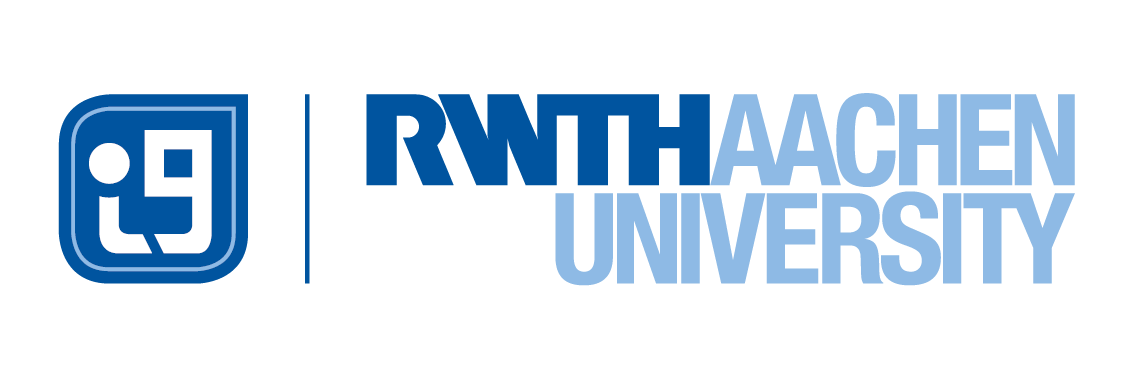</center>

<a id="top"></a>
# Pandas

## Overview
* [Getting Started](#gettingStarted)
* [Focussing on a Single Column](#focussingOnASingleColumn)
* [Modifying `DataFrames`](#ModifyingDataFrames)
* [Selecting and Filtering Rows](#SelectingAndFilteringRows)
* [Aggregating Data](#aggregatingData)
* [Mystery - Is Aachen the rainiest city in Germany?](#RainiestCityInGermany)

__Pandas__ is a popular Python package for the exploration and analysis of large datasets. You'll get an intuition for what that means through the course of this notebook.

Why would you even want to use a complex package such as _Pandas_ with its data structures, long documentation, and way of thinking, when you could potentially do any data analysis imaginable using the ordinary Python data structures and functionality we've already learned?
There are two main reasons:
1. __Performance__ - Python is a very convenient language in many regards, but this convenience comes at a cost - performance.
We might not have run into slowdowns thus far, but once we start handling huge amounts of data, pure Python quickly reaches its limits.
_Pandas_ provides its data structures which trade some convenience for __huge gains in performance__ by internally utilizing _Numpy_.
2. __Convenience__ - _Pandas_ provides a lot of ready-to-use high-level functions for common data analysis tasks, which would be time-consuming, error-prone, and tedious to write by hand.
We'll see examples of this in the form of _grouping_, _resampling time series_, and _filtering_.

Doing data science effectively always involves working with __incomplete__ and __inconveniently formatted data__, hence a large part of this work is adapting to the input format and cleaning data.
Most importantly, we should always ask ourselves whether what we see in terms of data, be it input data or derived, makes sense within our domain - and if it doesn't, investigate and try to find the culprit.
It may seem a little unglamorous, but 90% of data science is importing data correctly and accounting for missing data, and cleaning what we have found. We'll try to replicate a bit of that experience here.

Let's go ahead and import _Pandas_ then.

---
<a  id='gettingStarted'></a>
## [Getting Started](#top)

In [ ]:
import pandas as pd

While we're at it, let's also import __numpy__, which is the _numerical_ library that powers _Pandas_ under the hood. _Pandas_ will internally import it anyway, the reason we're also doing it is that we want access to a few handy symbols from _numpy_ later on.

In [ ]:
import numpy as np

It's always easier to learn libraries when you have a little task to guide you along. Hence in this notebook, we'll try to answer one of humanity's oldest and most vexing questions - _is Aachen really the rainiest place in Germany?_

Historical weather data can be downloaded from the [archives](http://opendata.dwd.de) of the German Meteorological Services (Deutscher Wetterdienst, DWD). For your convenience, we've already done that, so let's have a look at some hourly precipitation data for Aachen.

In [ ]:
aachen_raindata_file = "data/weather/aachen_precipitation.txt"

When working with _Pandas_, we keep our data in its specialized data structure, the __Pandas `DataFrame`__, which enables highly efficient operations on huge datasets. Let's create one by loading our precipitation data using the `read_csv` function of the Pandas package:

In [ ]:
aachen_raindata = pd.read_csv(aachen_raindata_file)
aachen_raindata # shows the first 5 and the last 5 rows of the dataFrame

A __Pandas `DataFrame`__ represents a table in which data is represented in rows and columns, much like in an _Excel spreadsheet_.

In [ ]:
type(aachen_raindata)

Each row in our table can be addressed using its _index_. What that index is might change depending on the application - we might want to index our data by timestamps, a combination of timestamps and weather station ids or something else entirely. We can find how our `DataFrame` is currently indexed like so:

In [ ]:
aachen_raindata.index

Currently, our data is simply indexed by ascending integers, starting at zero. That is the default behavior. We have 135.469 rows (entries). We can also explicitly find out the number of rows by using the well-known built-in function `len`:

In [ ]:
len(aachen_raindata)

Now that we know what our rows are - what are our columns?

In [ ]:
aachen_raindata.columns

Now this doesn't look right - we've only got a single column with all the data squished together. Let's look at the [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) for `read_csv`:

In [ ]:
# uncomment to view documentation inline
# help(pd.read_csv)

The default separator for identifying columns is a comma (thus csv - comma-separated values), but our file uses semicolons. This we can tell read_csv, when reading in data. Let's try again:

In [ ]:
aachen_raindata = pd.read_csv(aachen_raindata_file, sep=";") # alternative: delimiter=";"
aachen_raindata

This looks more like a table/spreadsheet with data in several columns. Let's have another look at the `columns` attribute:

In [ ]:
aachen_raindata.columns

Much better, but there is some leading whitespace before `R1`. That's confusing and not what we wanted. Looking a the [documentation](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) again, we learn that we can instruct `read_csv` to trim whitespace following the separating semicolons. This is good for trimming the header of the columns as well as data entries. Thus retry like this:

In [ ]:
aachen_raindata = pd.read_csv(aachen_raindata_file, delimiter=";", skipinitialspace=True)
aachen_raindata

One final look:

In [ ]:
aachen_raindata.columns

Looks good!

To make sense of this data, we need to look at the documentation also provided by the DWD alongside the dataset. Here are the important bits for us:

| Column Name | Description|
|-------------|------------|
|STATIONS_ID|The id of the weather station. Aachen is number 3.|
|MESS_DATUM|A timestamp for the measurement in the format `yyyymmddhh`.|
|QN_8|A quality level indicator for each measurement.|
|R1|Hourly precipitation in mm|
|RS_IND|`1` if there was any precipitation, `0` otherwise|
|WRTR|Classification of precipitation (snow, hail, rain, etc.)|
|eor|`End Of Record` - each line in the original file ends like this.|

We can also check the data type of each of the columns:

In [ ]:
aachen_raindata.dtypes

How to address single rows, we'll introduce in a while. Let's first have a look at the columns of our dataset.

---
<a  id='focussingOnASingleColumn'></a>
## [Focussing on a Single Column](#top)

From the preview of our dataFrame we've seen so far, it seems as if all entries might be zero. Let's have a closer look at that particular column. We can use a dictionary-like syntax for that:

In [ ]:
hourly_precipitation = aachen_raindata['R1']
hourly_precipitation

An alternative way to address a single column is using the header string of the column as if it were an attribute of the dataFrame:

In [ ]:
aachen_raindata.R1

Each column of a pandas `DataFrame` corresponds to the pandas data type `Series`, on which already small analyses can be performed by using built-in functions, like `max()` or `mean()`. 

Let's quickly check the type of this `hourly_precipitation` object we've just created:

In [ ]:
type(hourly_precipitation)

A __Series__ is the specialized data structure for _one-dimensional_ data in _Pandas_. That is in contrast to _`DataFrames`_, which represent tables, i.e. _two-dimensional_ data.

Internally, _Pandas_ stores its __Series__ data in an __array__, which we can access like so:

In [ ]:
hourly_precipitation.array

<a id="arrays"></a>
Though arrays have many conceptional similarities with `lists`, they differ in two key points:
- they may only contain __data of one type__
- their __length is fixed__

These two properties enable a significantly more efficient representation in memory, which is one of the key reasons _Pandas_ operations can achieve such high performance.


There are a lot of useful methods on _Series_, which you can check out in the [documentation](https://pandas.pydata.org/docs/reference/api/pandas.Series.html#pandas.Series). We'll start by using a few functions from _univariate statistics_ (i.e. statistical analysis with a single variable):

- `max`
- `mean`

In [ ]:
print("maximum:", hourly_precipitation.max())
print("mean:", hourly_precipitation.mean())
print("median:", hourly_precipitation.median())

How can the mean hourly precipitation be negative? That doesn't make sense. Let's use the convenient `describe` method to give us a couple of statistical indicators all at once for an overview:

In [ ]:
hourly_precipitation.describe()

There seems to be at least one negative value in our dataset, namely `-999`.

We can find out how many there are by filtering the _Series_ using a _lambda expression_ to specify certain values, and then count how many there are:

In [ ]:
hourly_precipitation[lambda x: x == -999].count()

Considering there are 248 such values in our dataset, these must have some special meaning.
And indeed - the documentation that came with the DWD data explains that `-999` is used to indicate _missing data_.

Missing data is simply a fact of life when dealing with real-world datasets.
However, we need to teach _Pandas_ which values to interpret as missing data, right now it will just assume that `-999` is the precipitation value in that particular cell.

Let's modify our _`DataFrame`_ by replacing `-999` with `np.nan`. `np` is the name we gave the `numpy` package when importing it (as is the convention within the `numpy` community) and `nan` stands for "not a number", which is used to indicate missing data.
The `inplace` option tells the `replace` method to modify the existing `DataFrame` rather than returning a new one.

In [ ]:
aachen_raindata.replace(to_replace=-999, value=np.nan, inplace=True)
hourly_precipitation = aachen_raindata['R1']
hourly_precipitation.describe()

Now this looks much more reasonable.

Let's get back to working with our entire table! We can check, how many measured data are missing, now coded as `NaN` values, which are not counted:

In [ ]:
aachen_raindata.count()

We have more dates than data:

In [ ]:
len(aachen_raindata) - aachen_raindata.R1.count()

For the classification of the type of precipitation, we are even missing many more values. If we want to ignore the dates, where data is missing, we can drop all rows with missing values:

In [ ]:
only_complete_data = aachen_raindata.dropna()
only_complete_data.count()

For our analytics, we continue with the missing data, because we only sum up values and compute averages and the like, in which cases `NaN` values are ignored anyways.

---
<a id='ModifyingDataFrames'></a>
## [Modifying `DataFrames`](#top)

In [ ]:
aachen_raindata

In [ ]:
aachen_raindata.STATIONS_ID.describe()

Here's a quick reminder of what the columns mean, along with what we're going to do with them:

| Column Name | Description| Action |
|-------------|------------|--------|
|STATIONS_ID|The id of the weather station. Aachen is number 3.| Discard - they're all identical |
|MESS_DATUM|A timestamp for the measurement in the format `yyyymmddhh`.| Parse into proper Python timestamp |
|QN_8|A quality level indicator for each measurement.| Discard - we won't use this |
|R1|Hourly precipitation in mm|Keep|
|RS_IND|`1` if there was any precipitation, `0` otherwise|Keep|
|WRTR|Classification of precipitation (snow, hail, rain, etc.)|Discard - we won't use this|
|eor|`End Of Record` - each line in the original file ends like this.|Discard - does not contain information|

First, we discard the data that is unimportant to us using the function `drop()`: By passing `inplace=True` to the `drop` method, we tell Pandas to alter our existing `DataFrame`, rather than returning a new one with the columns dropped.

In [ ]:
aachen_raindata.drop(columns=['STATIONS_ID', 'QN_8', 'WRTR', 'eor'], inplace=True)
aachen_raindata

Alternatively, we can create a new DataFrame and address only the columns we are interested in. Then the original DataFrame is not changed:

In [ ]:
ac_rain = aachen_raindata[['R1', 'RS_IND', 'MESS_DATUM']]
ac_rain

Right now, the timestamps in the `MESS_DATUM` column are simply long numbers to Python. Let's parse them into proper __datetime__ objects so we can work with them. _Pandas_ provides a handy function for that:

In [ ]:
aachen_raindata['time'] = pd.to_datetime(aachen_raindata['MESS_DATUM'])
aachen_raindata

Again, this doesn't quite look right. Apparently, our timestamps weren't in the format that `to_datetime` expects by default. We can specify an input format for our timestamps by providing a format string using the building blocks described in the [documentation](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes). Let's try again:

In [ ]:
aachen_raindata['time'] = pd.to_datetime(aachen_raindata['MESS_DATUM'], format="%Y%m%d%H")
aachen_raindata

Third, we rename the headers for better understanding. We also delete the column with the old timestamp format, as we no longer need this either:

In [ ]:
aachen_raindata.rename(columns={'R1': 'mm', 'RS_IND': 'prec'}, inplace=True)
aachen_raindata.drop(columns="MESS_DATUM", inplace=True)
aachen_raindata

Now we have turned the weather data into a usable dataset that we can analyze. This we will save, so that we need not redo all the cleaning and preparation everytime when we want to re-analyze or look for further information.

In [ ]:
aachen_raindata.to_csv("data/weather/aachen_raindata.csv")

Check out the written csv file [aachen_raindata.csv]("p4ds-data/weather/aachen_raindata.csv"). You will find, that we wrote a complete DataFrame including the index, which is automatically added when we read the same data again. 

In [ ]:
aachen_raindata = pd.read_csv("data/weather/aachen_raindata.csv")
aachen_raindata

Thus, we want to write the data without the index. Let's repair our data set (which also shows the way how to get rid of the duplicate index.

In [ ]:
aachen_raindata.drop(columns='Unnamed: 0', inplace=True)
aachen_raindata

And now write without the index:

In [ ]:
aachen_raindata.to_csv("data/weather/aachen_raindata.csv", index=False)

Check out the file [aachen_raindata.csv]("p4ds-data/weather/aachen_raindata.csv") again.

---
<a  id='SelectingAndFilteringRows'></a>
## [Selecting and Filtering Rows](#top)

Now let's start this section with the cleaned and saved data. We use the `parse_dates` option to interpret our time series correctly (rather than loading it as strings).

In [ ]:
import pandas as pd
import numpy as np
aachen_raindata = pd.read_csv("data/weather/aachen_raindata.csv", parse_dates=[2])
aachen_raindata

When browsing our dataset, we need a way to access any particular set of rows we might want. Let's look at a few methods that allow us to do just that:

We can access the first `n` rows using `head(n)` like so:

In [ ]:
aachen_raindata.head(3)

Similarly for the last rows:

In [ ]:
aachen_raindata.tail(3)

Or a few randomly chosen ones:

In [ ]:
aachen_raindata.sample(3)

If we want to access a particular row in our `DataFrame` by its label, we can do so using the `loc` property in combination with the subscript operator (the index):

In [ ]:
aachen_raindata.loc[47]

It works for ranges of rows as well, but confusingly includes both endpoints, unlike regular `list` slicing syntax in Python:

In [ ]:
aachen_raindata.loc[47:53]

Now let's select rows based on their data, i. e. filter them. The `loc` property we've used so far can take a `Series` of `boolean` values for that use case. Let's say we're interested in all rows where the precipitation indicator is `1.0` - we can define a filter `Series` like so:

In [ ]:
rain_indices = aachen_raindata.prec == 1.0
rain_indices

Passing it to `loc` gives us only the rows where the `Series` is `True`:

In [ ]:
aachen_raindata.loc[rain_indices]

Instead of saving our index `Series` to a variable first, we can just as well define it directly within the subscript operator. When combining multiple `boolean Series` with `and` or `or`, as a quirk resulting from their implementation in _Pandas_, we have to use the following operators:

- `&` for `and`
- `|` for `or`

Hence we can find all the rows representing hours during which it rained an amount that did not get rounded to zero like this:

In [ ]:
aachen_raindata[(aachen_raindata.prec == 1) & aachen_raindata.mm > 0]

In [ ]:
len(aachen_raindata[aachen_raindata.prec > 0.0]) - len(aachen_raindata[aachen_raindata.mm > 0])

So now we know that we had 16.676 hours with measurable precipitation in Aachen in the observed 135.457 hours between 1995 and 2011. (and also that there were 20.734 hours of rain with precipitation rounded to zero). 

In [ ]:
aachen_realtive_precip = round(16.676 / 135.457, 4)
aachen_realtive_precip

And we can look for heavy rain occasions, such as:

In [ ]:
aachen_raindata[aachen_raindata.mm > 15]

We observe that heavy rain occasions are rare, usually occur in August (some June/July), and seem to become more frequent lately.

---
<a  id='aggregatingData'></a>
## [Aggregating Data](#top)

Great! Now that we've got our data parsed and prepared, we can start asking it questions. Like how many milliliters of total precipitation was recorded year over year? What do we need to do to get that information?

_Pandas `DataFrames`_ offers a handy method called `resample` that allows aggregating rows over a specified period of time. All we have to do is to provide the time period (the notation for which we find in the [docs](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases)), the name of the column we'd like to be interpreted as timestamps, as well as call a method for the actual aggregation, in our case `sum`:

In [ ]:
# sum up all the values (mm, prec) per year ('y') specified in column 'time'
aggregated_yearly_precipitation = aachen_raindata.resample('y', on="time").sum()
aggregated_yearly_precipitation

Let's quickly plot that data to get a sense of it:


In [ ]:
import matplotlib
aggregated_yearly_precipitation.plot.bar()

The plotting functionality in _Pandas_ `DataFrames` is rather limited as it's mostly intended for visual data exploration, rather than elegant presentation.

There's one interesting thing we immediately see - the total number of rainy hours for 1995 and 2011 is much lower than for all other years. The reason for that is that we don't have data for every month of these years. Depending on what we want to find or show, we should probably have cleaned those rows before. 

Let's look at the values from the first row in our aggregated data:

In [ ]:
aggregated_yearly_precipitation.loc[0]

Now what happened there? Why is there no _index_ `0`? Why can't we use indices of type `int` anymore? It used to work before aggregation, what is the _index_ now?

In [ ]:
aggregated_yearly_precipitation.index

Our _indices_ now are __timestamps__, so we might access the first row like so:

In [ ]:
aggregated_yearly_precipitation.loc['2008-12-31']

Now that's a little cumbersome and we do need to know the _label_ of the first row. How do we access the first row regardless of its label type? By using the `iloc` property (think "integer location"), like so:

In [ ]:
aggregated_yearly_precipitation.iloc[13]

Let's use our newfound aggregation powers to find out which month is the rainiest over the observed time period - first, we sum up the hourly precipitation for each month:

In [ ]:
# focus on prec and time (which we need for aggregation per month)
aachen_raindata.filter(['prec', 'time'])

In [ ]:
# sum up precipitation per month
rain_hours_per_month = aachen_raindata.filter(['prec', 'time']).resample('m', on='time').sum()
rain_hours_per_month

In [ ]:
rain_hours_per_month.describe()

Over the observed time period of 187 months, the driest month only had 4 hour-intervals of _measurable_ precipitation, the rainiest 378 hour-intervals. The mean over all monthly precipitation values is 200 hour slots.

If we are interested in the concrete months, which were the driest and the rainiest:

In [ ]:
rain_hours_per_month.loc[rain_hours_per_month.prec == 4]

In [ ]:
rain_hours_per_month.loc[rain_hours_per_month.prec == 378]

In order to compute the average precipitation per calendar month, we group by month and compute the mean. The `groupby` method takes a function that transforms a row's _index_ into whatever we want to group by. It's the perfect use case for `lambda` functions:

In [ ]:
mean_rain_hous_per_month = rain_hours_per_month.groupby(lambda time: time.month).mean()
mean_rain_hous_per_month

Now again let's plot that:

In [ ]:
mean_rain_hous_per_month.plot.bar()

Obviously, there are more rainy days in January .. March, and November .. December. The least rainy hour intervals have been observed in June.

When looking for the intensity of precipitation, we don't necessarily have to save our intermediate steps in variables, we might just as well do the complete computation in one line:
1. filter out rain data to only include the time and millimeters of rain per hour, 
2. sum the data up for each day, 
3. group by weekday and compute the average _all in one go_

In [ ]:
mean_mms_of_rain_by_weekday = aachen_raindata.filter(['time', 'mm']).resample("d", on='time').sum().groupby(lambda time: time.weekday()).mean()
mean_mms_of_rain_by_weekday

And because we can, let's plot that:

In [ ]:
mean_mms_of_rain_by_weekday.plot.bar()

As expected, the rain does not really care about the weekdays ;-)

---
<a  id='RainiestCityInGermany'></a>
## [Mystery - Is Aachen the rainiest city in Germany?](#top)

Now let's finally find out if Aachen is actually the rainiest city in Germany - there is a second file of aggregated daily precipitation data for all German stations. This we can load and prepare just like we did before:

In [ ]:
daily_precipitation_data_file = "data/weather/germany_precipitation_aggregated_2010.txt"
germany_raindata = pd.read_csv(daily_precipitation_data_file, delimiter=";", skipinitialspace=True)
germany_raindata

In contrast to the previous file, which only contained measurements for Aachen, this file contains data from weather stations from all over Germany, hence the station's ids are important now. In order to keep track of them, we have to keep the column of the `STATIONS_ID`.

Apart from that, let's preprocess the data just like we did before:

In [ ]:
germany_raindata['MESS_DATUM'] = pd.to_datetime(germany_raindata['MESS_DATUM'], format="%Y%m%d%H")
germany_raindata.drop(columns=["QN_8", "WRTR", "eor"], inplace=True)
germany_raindata.rename(columns={'STATIONS_ID': 'station_id', 'MESS_DATUM': 'time', 'R1': 'mm', 'RS_IND': 'prec'}, inplace=True)
germany_raindata

Overall, we have 349.904 entries for various weather stations over the year 2010.

Using the `groupby` method, we can introduce the _station\_id_ as a new index, giving us a _compound index_ of _station id_ and _time stamp_. Resampling and summing up those gives us the yearly precipitation for any given _station id_:

In [ ]:
yearly_data = germany_raindata.groupby('station_id', ).resample('y', on='time').sum()
yearly_data

As you can see, we now have the _station id_ as an index field, in addition to _time_. What we also have though is the sum of all _station ids_ for every _station id_, which doesn't make much sense. We can safely delete that colummn now that we have the _station id_ as index:

In [ ]:
yearly_data.drop(columns=["station_id"], inplace=True)
yearly_data

Neat. But what are these places? Let's load a list with a mapping between the _station id_ and the actual name of the station:

In [ ]:
station_mapping_path = "data/weather/stations.csv"
station_mapping = pd.read_csv(station_mapping_path)
station_mapping

Ok, there are 1459 weather stations in Germany. We already knew station number 3 in Aachen. Now let's insert this information into our weather data data frame:

Using the `merge` method and passing it the column we want to use as keys for our join operation, we can get a `DataFrame` where the data for every station is matched up with it's name:

In [ ]:
# JOIN both data frames using station_id as key (SQL: JOIN on ...)
yearly_data_with_names = yearly_data.merge(station_mapping, on='station_id')
yearly_data_with_names

Now we can __finally__ find out the wettest and rainiest places in Germany:

In [ ]:
wettest_places = yearly_data_with_names.sort_values(by='mm', ascending=False)
wettest_places

In [ ]:
rainiest_places = yearly_data_with_names.sort_values(by='prec', ascending=False)
rainiest_places.head(40)

And there we have it - the place in Germany with the highest amount of precipitation hour intervals in 2010 was _Balderschwang_ in Bavaria and the rainiest place was the _Kahler Asten_, a mountain in the Sauerland region.

Now whenever you hear someone whine about how it always rains in this wonderful city - you know what to tell them!

In [ ]:
yearly_data_with_names.describe()

In [ ]:
yearly_data_with_names.loc[yearly_data_with_names.station_name == 'Aachen']

So Aachen has below average amount of rainfall! Let's not talk about the precipitation hour intervals though ;-)

---
# [Summary](#top)

Within this lecture, you have learned how to do the following with `Pandas`:

+ import data
+ deal with missing data
+ filter and select rows
+ aggregate data
+ create quick and dirty plots for data exploration
+ group data by arbitrary attributes
+ merge multiple tables

A short quite complete documentation of the main functionality of Pandas can be found in the [10 minutes to Pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html) overview section.

In the [next lecture](10_Matplotlib.ipynb), you will be introduced to `Matplotlib`, a widely used Python library for data visualization. 